In [1]:
from fastcore.xtras import load_pickle
import pandas as pd 
import os 
from glob import glob
from pathlib import Path
from scipy.stats import sem
import matplotlib.pyplot as plt
from datetime import datetime

import matplotlib.pyplot as plt
import sys
sys.path.append("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/")
from plotutils import *

plt.style.use("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/kevin.mplstyle")

FOLDER = 'out'

if not os.path.exists(FOLDER):
    raise FileExistsError('Cannot find folder {}'.format(FOLDER))

all_res = glob(f'{FOLDER}/*.pkl')
print(all_res)
print('Pickles found in {}: {}'.format(FOLDER, len(all_res)))

compiled_res_list = []
compiled_res_list2 = []
conf_mats = []

for results in all_res:
    res_full = load_pickle(results)
    res = res_full['results']
    summary = {
        'size': res_full['train_size'],
        'representation': res_full['data_summary']['representation'],
        #'target': res_full['data_summary']['target'],
        'accuracy': res['accuracy'],
        'f1_macro': res['f1_macro'],
        'f1_micro': res['f1_micro'],
        'kappa': res['kappa'],
        'num_epochs': res_full['config']['tune_settings']['num_train_epochs'],
        'lr': res_full['config']['tune_settings']['learning_rate'],
        'bins': len(set(res['all_y_true'])),
        'test_size': len(res['all_y_true']),       
    }
    confusion_matrix = {
        'all_y_true':res['all_y_true'],
        'all_y_pred':res['all_y_pred']
    }
    conf_mats.append(confusion_matrix)
    compiled_res_list.append(summary)

print(compiled_res_list)
compiled_res = pd.DataFrame(compiled_res_list)


['out/20240404-223629_1000_25_predictions.pkl', 'out/20240404-204114_1000_25_predictions.pkl', 'out/20240404-184701_1000_25_predictions.pkl', 'out/20240404-144502_1000_25_predictions.pkl', 'out/20240405-082039_1000_25_predictions.pkl', 'out/20240408-125054_1000_25_predictions.pkl', 'out/20240405-043137_1000_25_predictions.pkl', 'out/20240408-162034_1000_25_predictions.pkl', 'out/20240405-023714_1000_25_predictions.pkl', 'out/20240405-102815_1000_25_predictions.pkl', 'out/20240404-124953_1000_25_predictions.pkl', 'out/20240408-143546_1000_25_predictions.pkl', 'out/20240405-002952_1000_25_predictions.pkl', 'out/20240404-163846_1000_25_predictions.pkl', 'out/20240405-062720_1000_25_predictions.pkl']
Pickles found in out: 15
[{'size': 1000, 'representation': 'SMILES', 'accuracy': 0.68, 'f1_macro': 0.6794871794871795, 'f1_micro': 0.68, 'kappa': 0.3600000000000001, 'num_epochs': 25, 'lr': 0.0003, 'bins': 2, 'test_size': 50}, {'size': 1000, 'representation': 'NAME', 'accuracy': 0.66, 'f1_macr

In [2]:
compiled_res = compiled_res.loc[compiled_res['size'] == 1000]
groups = ['bins', 'num_epochs', 'representation']
grouped_res =compiled_res.groupby(groups).agg(['mean', 'sem'])

In [3]:
grouped_res

size       accuracy            f1_macro  \
                                  mean  sem      mean       sem      mean   
bins num_epochs representation                                              
2    25         NAME            1000.0  0.0  0.660000  0.046188  0.658506   
                SMILES          1000.0  0.0  0.686667  0.029059  0.686269   
                SMILES_random   1000.0  0.0  0.606667  0.043716  0.604493   
                len_smiles      1000.0  0.0  0.580000  0.052915  0.576199   
                name_smiles     1000.0  0.0  0.706667  0.046667  0.704683   

                                          f1_micro               kappa  \
                                     sem      mean       sem      mean   
bins num_epochs representation                                           
2    25         NAME            0.047388  0.660000  0.046188  0.320000   
                SMILES          0.029202  0.686667  0.029059  0.373333   
                SMILES_random   0.042978  0.606667  0.043716  0.213333   
                len_smiles      0.054837  0.580000  0.052915  0.160000   
                name_smiles     0.047019  0.706667  0.046667  0.413333   

                                              lr      test_size       
                                     sem    mean  sem      mean  sem  
bins num_epochs representation                                        
2    25         NAME            0.092376  0.0003  0.0      50.0  0.0  
                SMILES          0.058119  0.0003  0.0      50.0  0.0  
                SMILES_random   0.087433  0.0003  0.0      50.0  0.0  
                len_smiles      0.105830  0.0003  0.0      50.0  0.0  
                name_smiles     0.093333  0.0003  0.0      50.0  0.0

# Plot bar plot

['SMILES', 'NAME', 'name_smiles', 'len_smiles', 'SMILES_random']
{'SMILES': [0.6866666666666666], 'NAME': [0.66], 'name_smiles': [0.7066666666666667], 'len_smiles': [0.5800000000000001], 'SMILES_random': [0.6066666666666668]}
SMILES
NAME
name_smiles
len_smiles
SMILES_random


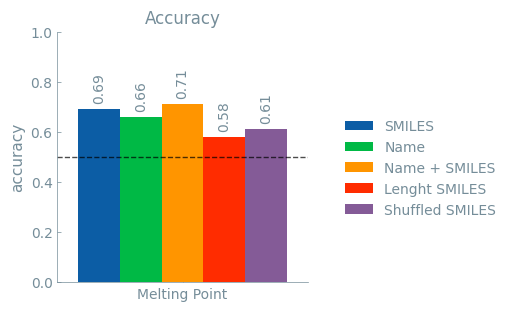

In [4]:
REPRES_DICT = {'NAME': 'Name',
               'SMILES': 'SMILES',
               'SMILES_random': 'Shuffled SMILES',
               'len_smiles': 'Lenght SMILES',
               'name_smiles': 'Name + SMILES'
               }

import numpy as np
COLORS = ['Forestgreen', 'maroon', 'purple', 'red']
represenations = sorted(list(compiled_res['representation'].unique()))
represenations = ['SMILES', 'NAME', 'name_smiles', 'len_smiles', 'SMILES_random']
print(represenations)
COLOR_DICT = {t:c for t,c in zip(represenations, COLORS[0:len(represenations)])}
dict_final = {r:[] for r in represenations}

METRIC = 'accuracy'
WIDTH = 0.10
multiplier = 0
x = np.arange(1)

for repr in represenations:
    df_part = compiled_res.loc[(compiled_res['representation'] == repr)]
    if len(df_part) == 0:
        mean_acc = 0
    else:
        mean_acc= df_part[METRIC].mean()
    dict_final[repr].append(mean_acc)
print(dict_final)
fig, ax = plt.subplots(layout='compressed', figsize = (5,3))
for representation, metric_values in dict_final.items():
    print(representation
          )
    representation = REPRES_DICT[representation]
    metric_values = [round(m, 2) for m in metric_values]
    offset = WIDTH * multiplier
    rects = ax.bar(x + offset, metric_values, WIDTH, label=representation, 
                   #yerr = 5,
                   #color = COLOR_DICT[attribute]
                   )
    ax.bar_label(rects, padding=4, rotation = 90, size = 10)
    multiplier += 1

ax.set_ylabel(METRIC)
ax.set_title(METRIC.capitalize())
targets_labels = ['Melting Point']
ax.set_xticks(x + WIDTH+WIDTH, targets_labels, rotation = 0)
ax.set_ylim(0, 1)

ax.hlines(0.5, -0.1, 0.5 , colors='black', linestyles='--', alpha = 0.7)


ax.legend(ncols=1, bbox_to_anchor=(1.1, 0.7))

plt.savefig('MeltingPoint_barplot.pdf')
plt.show()


# Plot Confusion Matrix

SMILES
[0, 3, 14]
NAME
[1, 6, 10]
name_smiles
[2, 8, 9]
len_smiles
[5, 7, 11]
SMILES_random
[4, 12, 13]


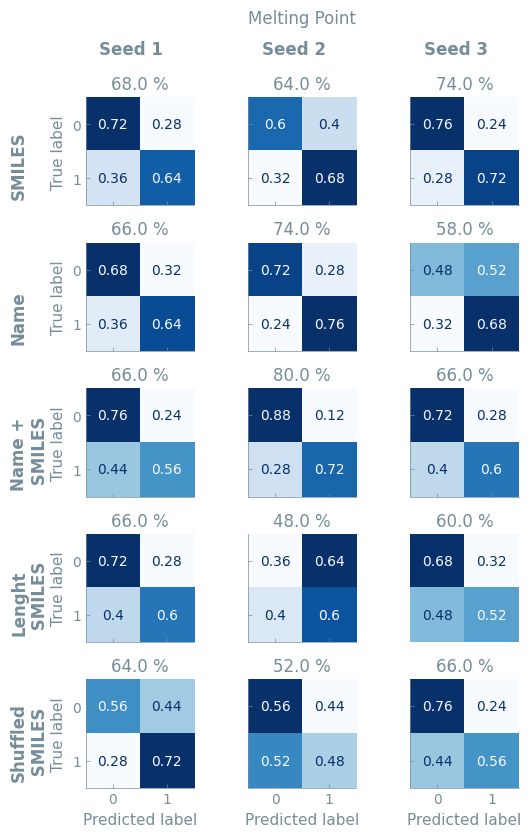

In [5]:
from sklearn import metrics

REPRES_DICT_CM = {'NAME': 'Name',
               'SMILES': 'SMILES',
               'SMILES_random': 'Shuffled\n SMILES',
               'len_smiles': 'Lenght\n SMILES',
               'name_smiles': 'Name +\n SMILES'
               }

fig, axs = plt.subplots(len(represenations), 3,
                            figsize = (8.5,8.5),
                            tight_layout = True,
                            sharex=True,
                            sharey=True,
                            )
fig.suptitle('Melting Point')

for i, repre in enumerate(represenations):
    axs[i, 0].text(-1.9,1.3, 
                    REPRES_DICT_CM[repre].split('- ')[-1], 
                    rotation = 90,
                    size = 12,
                    weight = 'bold'
                    )
    print(repre)
    indices = [compiled_res_list.index(d) for d in compiled_res_list if d['representation'] == repre and d['size'] == 1000]    
    print(indices)

    for j, index in enumerate(indices):
        confusion_m = conf_mats[index]
        true = confusion_m['all_y_true']
        pred = confusion_m['all_y_pred']

        if true:

            confusion_matrix = metrics.confusion_matrix(true, pred)
            confusion_matrix_normalized = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

            cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_normalized, display_labels = ['0','1'])
            cm_display.plot(ax= axs[i,j], cmap=plt.cm.Blues, colorbar=False)

            ac = metrics.accuracy_score(true, pred)

        axs[i,j].set_title(f"{round(ac*100, 2)} %")

        if i != 4:
            axs[i,j].set_xlabel('')
        if j != 0:
            axs[i,j].set_ylabel('')
            
        if i ==0:
            axs[i,j].text(-0.25,-1.3, f'Seed {j+1}',
                    rotation = 0,
                    size = 12,
                    weight = 'bold')
            axs[3,2].axis('off')
        fig.savefig('MeltingPoint_ConfusionMatrices.pdf')